In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
k = 1   #Stivhet

c = 0   #Demping

m = 0   #Masse

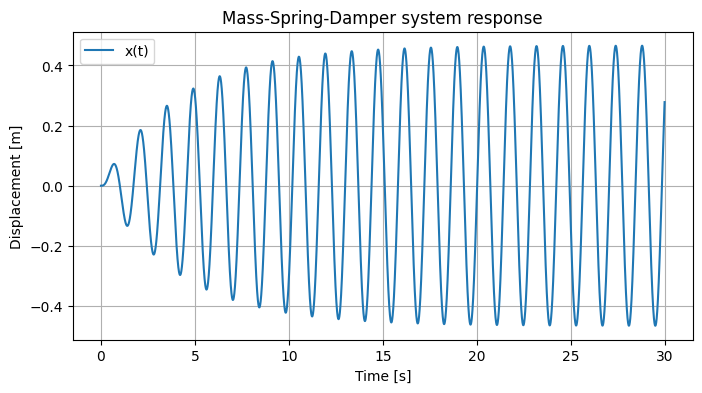

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def mass_spring_damper(m, c, k, F_ext_fn, x0, v0, t):
    """
    Simulate m*x'' + c*x' + k*x = F_ext(t)
    
    params:
      m     : mass
      c     : damping coefficient
      k     : spring constant
      F_ext_fn : external force as function of time F_ext_fn(t)
      x0    : initial displacement
      v0    : initial velocity
      t     : array of time points (1D numpy array)
    
    returns:
      x : displacement array same size as t
      v : velocity array same size as t
    """
    n = len(t)
    dt = t[1] - t[0]
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    
    for i in range(n-1):
        ti = t[i]
        xi = x[i]
        vi = v[i]
        # acceleration from equation: a = (F_ext - c*v - k*x)/m
        ai = (F_ext_fn(ti) - c*vi - k*xi) / m
        
        # simple Euler integration (could upgrade to RK4)
        v[i+1] = vi + ai*dt
        x[i+1] = xi + vi*dt
        
    return x, v

if __name__ == "__main__":
    # parameters
    m = 1.0       # kg
    c = 0.5       # N·s/m damping
    k = 20.0      # N/m spring constant
    
    # external force: for example sinusoidal
    def F_ext(t):
        return 1.0 * np.sin(np.sqrt(k/m)*1.0*t)  # 1 Hz sine with amplitude 1 N
        #return 1.0 * np.sin(1.0*t)
        #return 1.0 * np.sin(2.0*np.pi*1.0*t) 
    
    # time array
    T = 30.0     # seconds
    dt = 0.001   # time step
    t = np.arange(0, T, dt)
    
    # initial conditions
    x0 = 0.0
    v0 = 0.0
    
    x, v = mass_spring_damper(m, c, k, F_ext, x0, v0, t)
    
    # plot displacement
    plt.figure(figsize=(8,4))
    plt.plot(t, x, label="x(t)")
    plt.xlabel("Time [s]")
    plt.ylabel("Displacement [m]")
    plt.title("Mass-Spring-Damper system response")
    plt.legend()
    plt.grid(True)
    plt.show()
